In [1]:
# Import required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.model_selection import KFold, RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the file
data = pd.read_csv('insurance.csv')
print(data.shape)
data.head()

(1338, 8)


,age,sex,bmi,classif,children,smoker,region,charges
0,19,female,27.900,PREO,0,yes,southwest,16884.92400
1,18,male,33.770,OB1,1,no,southeast,1725.55230
2,28,male,33.000,OB1,3,no,southeast,4449.46200
3,0,male,22.705,N,0,no,northwest,21984.47061
4,32,male,28.880,PREO,0,no,northwest,3866.85520


In [3]:
# Check for datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [4]:
# Check for Null values
data.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Check for zero values
data.eq(0).any()

age          True
sex         False
bmi         False
classif     False
children     True
smoker      False
region      False
charges     False
dtype: bool

In [6]:
# Check for unique values in age column
data.age.unique()

array([ 19,  18,  28,   0,  32,  31,  46,  37,  60,  25,  62,  23,  56,
        27,  52,  30,  34,  59,  63,  55,  22,  26,  35,  24,  41,  38,
        36,  21,  48,  40,  58,  53,  43,  64,  20,  61,  44,  57,  29,
        45,  54, -58,  49,  47,  51,  42,  50,  39,  33, 190,  -1],
      dtype=int64)

In [7]:
# Fetching records with certain values in age column (outliers by observation)
data[data.age.isin([0,-1,-58,190])]

,age,sex,bmi,classif,children,smoker,region,charges
3,0,male,22.705,N,0,no,northwest,21984.47061
116,-58,male,49.060,OB3,0,no,southeast,11381.32540
565,190,female,30.495,OB1,0,no,northwest,2128.43105
1294,0,male,25.175,PREO,0,no,northeast,11931.12525
1337,-1,female,29.070,PREO,0,yes,northwest,29141.36030


In [8]:
# Deleting records with certain values age column (outliers by observation)
indexes = data[data.age.isin([0,-1,-58,190])].index
data.drop(indexes,inplace=True)
data.shape

(1333, 8)

In [9]:
# Fetching minimum and maximum values of bmi for each unique value of classif

for i in data.classif.unique():
    print(i)
    print('min : ',data[data.classif == i]['bmi'].min())
    print('max : ',data[data.classif == i]['bmi'].max())
    print('*'*50)

PREO
min :  25.08
max :  29.925
**************************************************
OB1
min :  30.0
max :  34.96
**************************************************
OB2
min :  35.09
max :  39.995
**************************************************
OB3
min :  40.15
max :  53.13
**************************************************
nan
min :  nan
max :  nan
**************************************************
N
min :  18.5
max :  25.0
**************************************************
UW
min :  15.96
max :  18.335
**************************************************


In [10]:
# Fetching the records with null values
data[data.classif.isnull()]

,age,sex,bmi,classif,children,smoker,region,charges
15,19,male,24.600,NaN,1,no,southwest,1837.23700
74,44,male,27.400,NaN,2,no,southwest,7726.85400
128,32,female,17.765,NaN,2,yes,northwest,32734.18630
173,35,female,34.800,NaN,1,no,southwest,5246.04700
559,19,male,35.530,NaN,0,no,northwest,1646.42970
671,29,female,31.160,NaN,0,no,northeast,3943.59540
839,59,female,31.350,NaN,0,no,northwest,12622.17950
1331,23,female,33.400,NaN,0,no,southwest,10795.93733


In [11]:
# Manually Replacing the null values in column 'classif' with relevant values (Based on 'bmi' values)
data.classif.loc[15] = 'N'
data.classif.loc[74] = 'PREO'
data.classif.loc[128] = 'UW'
data.classif.loc[173] = 'OB1'
data.classif.loc[559] = 'OB2'
data.classif.loc[671] = 'OB1'
data.classif.loc[839] = 'OB1'
data.classif.loc[1331] = 'OB1'

In [12]:
# check for null values
data.isnull().sum()

age         0
sex         0
bmi         0
classif     0
children    0
smoker      0
region      0
charges     0
dtype: int64

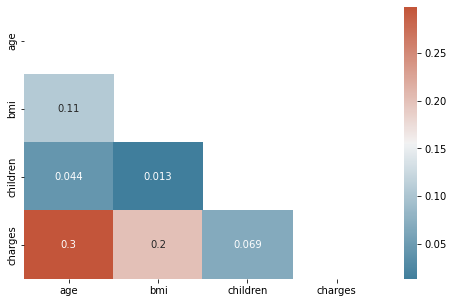

In [13]:
# Heatmap plot
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 5))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,annot = True)
plt.show()

In [14]:
# Function to check for outliers in each column
def myOutliers(df,col):
    Q3 = np.quantile(df[col],0.75)
    Q1 = np.quantile(df[col],0.25)
    
    IQR = Q3 - Q1
    
    global mylist
    global my_outlier_df
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    print('the lower range of',col,'is',lower_range)
    print('the upper range of',col,'is',upper_range)
    
    mylist = [x for x in df[col] if ((x < lower_range) | (x > upper_range))]
    print('total outliers in',col,'are',len(mylist))
    
    
    my_outlier_df = df.loc[df[col].isin(mylist)]
    return my_outlier_df

In [15]:
# Checking outliers for all the numerical columns
numeric_columns = ['age','bmi','children','charges']

for i in numeric_columns:
    myOutliers(data,i)
    print('**************************************')

the lower range of age is -9.0
the upper range of age is 87.0
total outliers in age are 0
**************************************
the lower range of bmi is 13.737499999999999
the upper range of bmi is 47.2775
total outliers in bmi are 8
**************************************
the lower range of children is -3.0
the upper range of children is 5.0
total outliers in children are 0
**************************************
the lower range of charges is -13034.076065
the upper range of charges is 34358.841975
total outliers in charges are 141
**************************************


In [93]:
data.to_csv(r"C:\Users\gv\Desktop\p\insurance1.csv")

## UNIVARIATE ANALYSIS

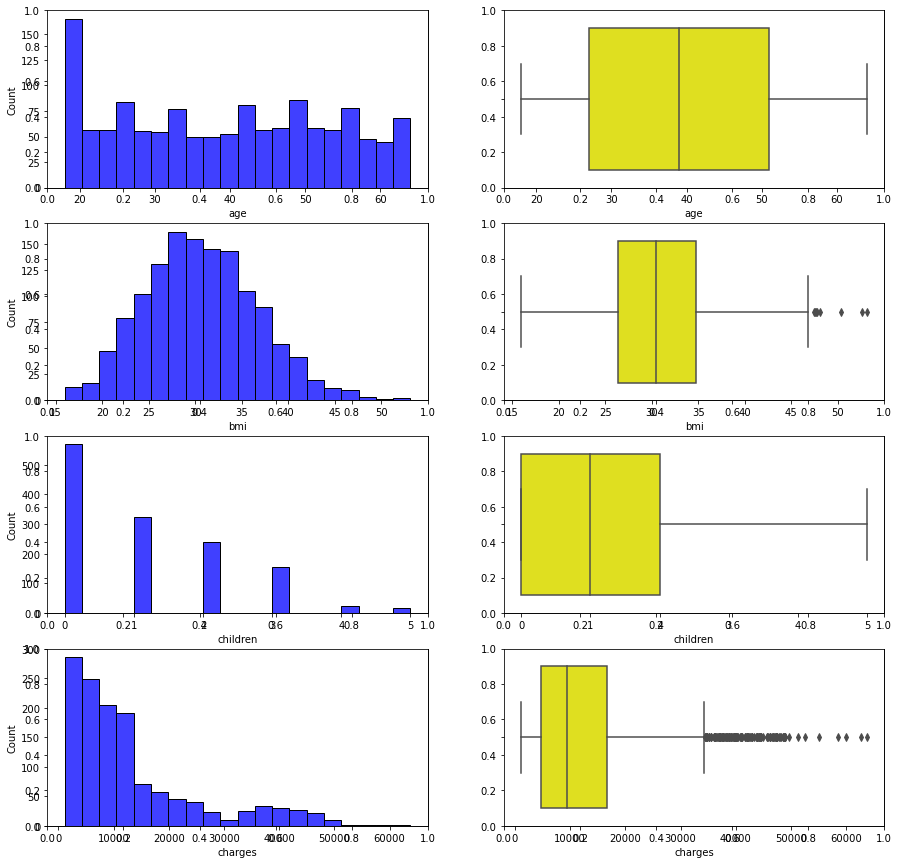

In [16]:
COLS = 2; POS = 1; ROWS = int(len(numeric_columns))
fig,ax = plt.subplots(ROWS,COLS,figsize=(15,15))
for i in numeric_columns:
    fig.add_subplot(ROWS,COLS,POS)  
    sns.histplot(data[i],bins=20,color='blue')
    POS+= 1  
    fig.add_subplot(ROWS,COLS,POS)  
    sns.boxplot(data[i],color='yellow')
    POS+= 1

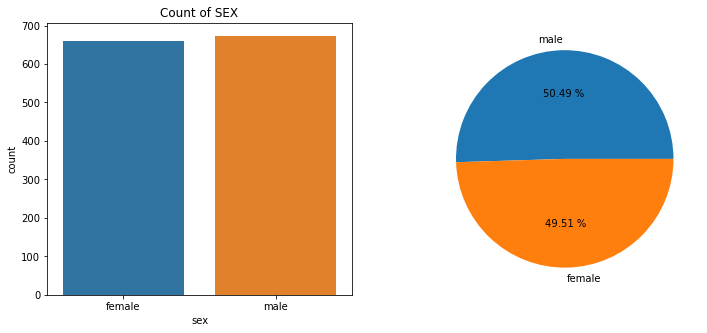

In [17]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of SEX')
percentage = data['sex'].value_counts()
labels = list(data['sex'].value_counts().index)

sns.countplot(x = data['sex'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

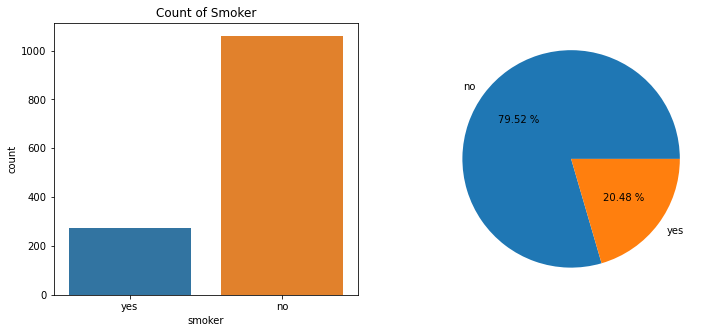

In [18]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of Smoker')
percentage = data['smoker'].value_counts()
labels = list(data['smoker'].value_counts().index)

sns.countplot(x = data['smoker'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

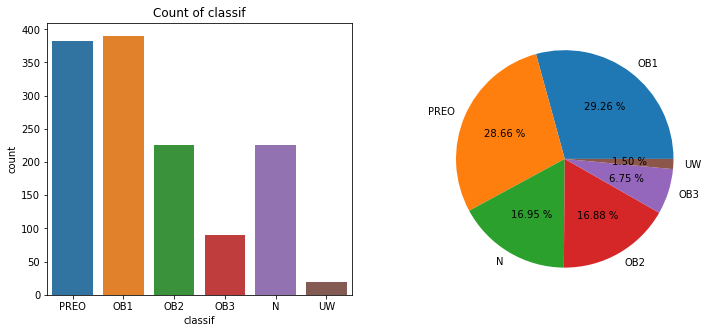

In [19]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of classif')
percentage = data['classif'].value_counts()
labels = list(data['classif'].value_counts().index)

sns.countplot(x = data['classif'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

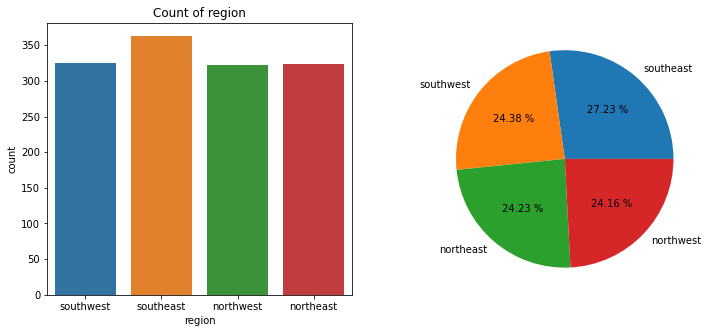

In [20]:
fig, ax = plt.subplots(1,2,figsize = (12,5))

ax[0].set_title('Count of region')
percentage = data['region'].value_counts()
labels = list(data['region'].value_counts().index)

sns.countplot(x = data['region'], ax = ax[0])
plt.pie(percentage,labels=labels,autopct = '%.2f %%')

plt.show()

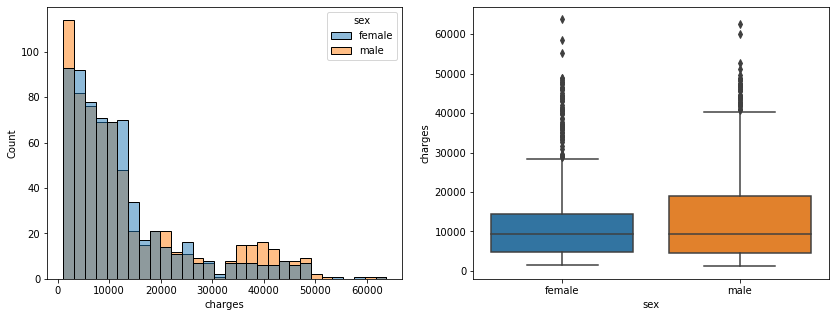

In [21]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot(x = data['charges'], hue = data['sex'],ax=ax[0])
sns.boxplot(y = data['charges'], x = data['sex'],ax=ax[1])

plt.show()

Text(0.5, 1.0, 'Age vs Charges')

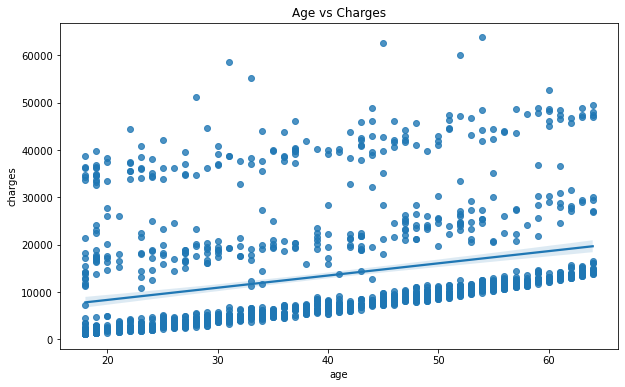

In [22]:
plt.figure(figsize = (10,6))
sns.regplot(data['age'],data['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges')

Text(0.5, 1.0, 'Bmi vs Charges')

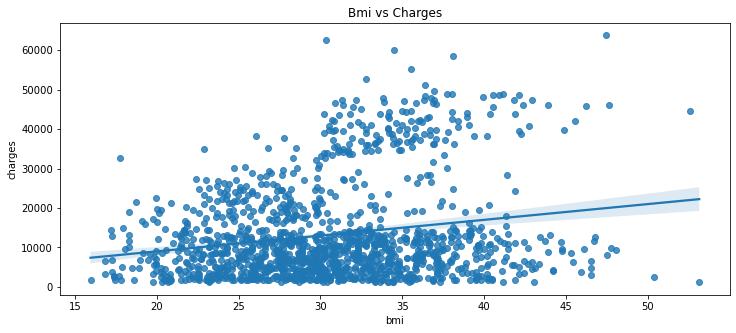

In [23]:
plt.figure(figsize = (12,5))
sns.regplot(data['bmi'],data['charges'])
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('Bmi vs Charges')

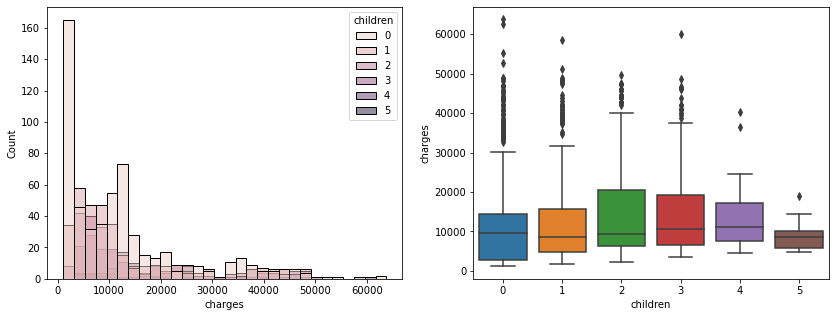

In [24]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot(x = data['charges'], hue = data['children'],ax=ax[0])
sns.boxplot(y = data['charges'], x = data['children'],ax=ax[1])

plt.show()

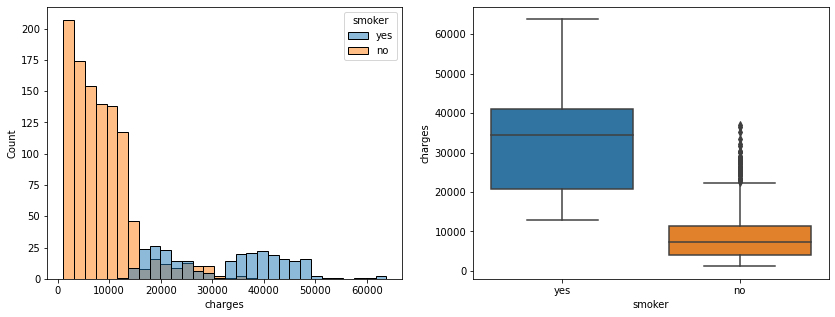

In [25]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot(x = data['charges'], hue = data['smoker'],ax=ax[0])
sns.boxplot(y = data['charges'], x = data['smoker'],ax=ax[1])

plt.show()

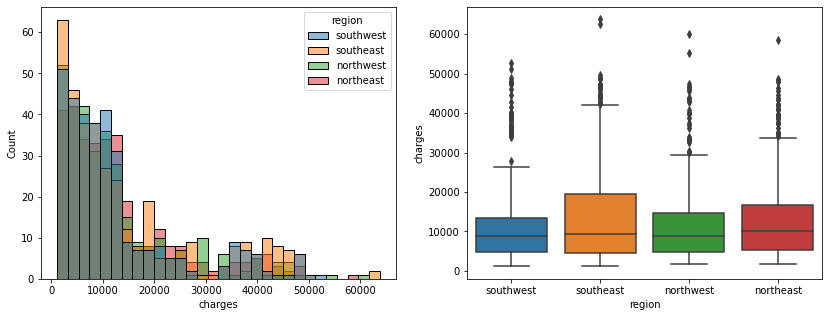

In [26]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot(x = data['charges'], hue = data['region'],ax=ax[0])
sns.boxplot(y = data['charges'], x = data['region'],ax=ax[1])

plt.show()

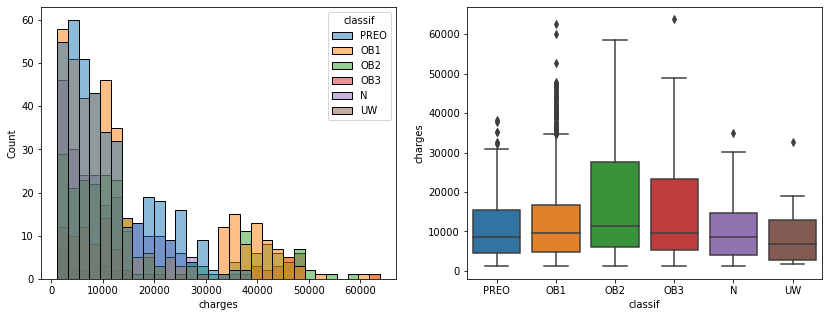

In [27]:
fig, ax = plt.subplots(1,2,figsize = (14,5))

sns.histplot(x = data['charges'], hue = data['classif'],ax=ax[0])
sns.boxplot(y = data['charges'], x = data['classif'],ax=ax[1])

plt.show()

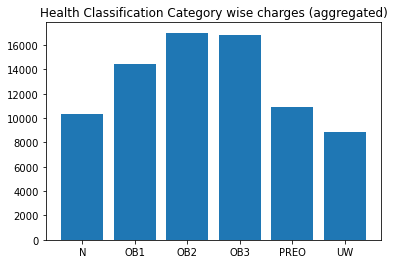

In [28]:
classif_charges = data.groupby('classif')['charges'].mean()

plt.bar(classif_charges.index,classif_charges.values)

plt.title('Health Classification Category wise charges (aggregated)')

plt.show()

## Multivariate

Text(0.5, 1.0, 'bmi vs charges vs smoker')

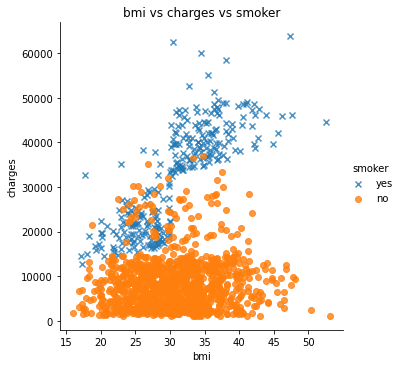

In [29]:
sns.lmplot(x='bmi', y='charges', hue='smoker', 
           markers=['x', 'o'],
           fit_reg=False, data=data)
plt.title('bmi vs charges vs smoker')

Text(0.5, 1.0, 'age vs charges vs smoker')

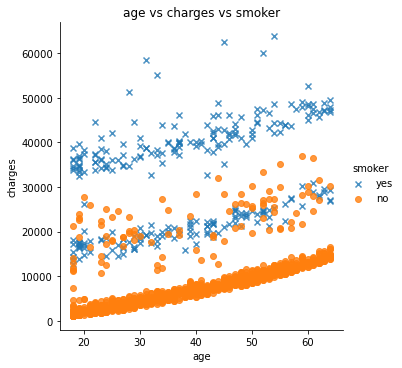

In [30]:
sns.lmplot(x='age', y='charges', hue='smoker', 
           markers=['x', 'o'],
           fit_reg=False, data=data)
plt.title('age vs charges vs smoker')

smoker           no           yes
sex                              
female  8774.447238  30692.484311
male    8046.280009  33042.005975


Text(0.5, 1.0, 'sex vs charges vs smoker')

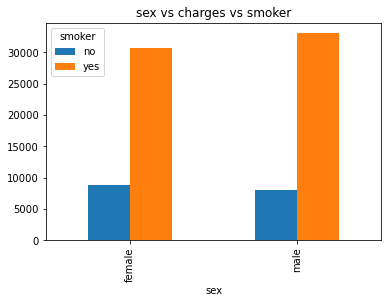

In [31]:
table = pd.pivot_table(data, values='charges', index=['sex'],
                    columns=['smoker'], aggfunc=np.mean, fill_value=0)
print(table)
table.plot(kind='bar')
plt.title('sex vs charges vs smoker')

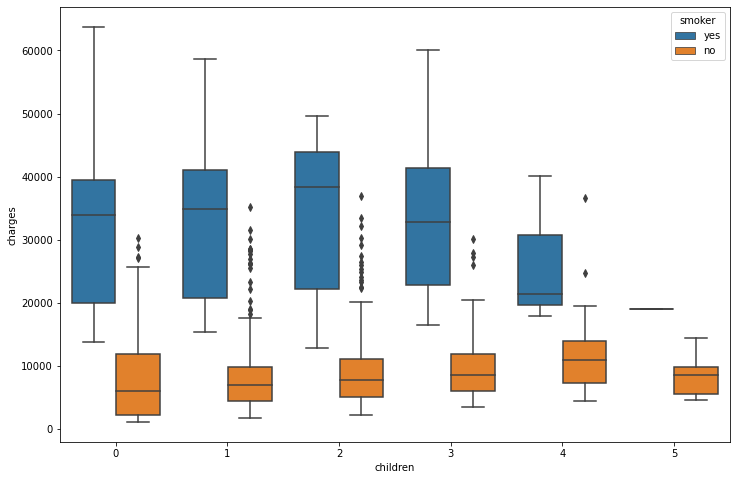

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x="children", y="charges", hue='smoker', data=data)

### Feature Selection

In [33]:
le = preprocessing.LabelEncoder()
data1 = data.copy()
y = data1['charges']

data1[['sex','classif','smoker','region']] = data1[['sex','classif','smoker','region']].apply(le.fit_transform)
data1

,age,sex,bmi,classif,children,smoker,region,charges
0,19,0,27.90,4,0,1,3,16884.9240
1,18,1,33.77,1,1,0,2,1725.5523
2,28,1,33.00,1,3,0,2,4449.4620
4,32,1,28.88,4,0,0,1,3866.8552
5,31,0,25.74,4,0,0,2,3756.6216
...,...,...,...,...,...,...,...,...
1332,52,0,44.70,3,3,0,3,11411.6850
1333,50,1,30.97,1,3,0,1,10600.5483
1334,18,0,31.92,1,0,0,0,2205.9808
1335,18,0,36.85,2,0,0,2,1629.8335


In [34]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data1.drop('charges',axis = 1), y, test_size=0.25)
print("X_train2={},X_test2={},y_train2={},y_test2={}".format(X_train2.shape,X_test2.shape,y_train2.shape,y_test2.shape))

X_train2=(999, 7),X_test2=(334, 7),y_train2=(999,),y_test2=(334,)


In [35]:
def run_randomforest(X_train,X_test,y_train,y_test):
    model = RandomForestRegressor()
    model.fit(X_train,y_train)
    model.predict(X_test)

    y_predicted = model.predict(X_test)

    print('accuracy_score :',model.score(X_test,y_test))

In [36]:
for index in range(1,len(data1.columns)):
    sel = RFE(RandomForestRegressor(),n_features_to_select = index)
    sel.fit(X_train2,y_train2)
    X_train_rfe = sel.transform(X_train2)
    X_test_rfe = sel.transform(X_test2)
    print('Selected features :',index)
    run_randomforest(X_train_rfe,X_test_rfe,y_train2,y_test2)

Selected features : 1
accuracy_score : 0.5835490683802453
Selected features : 2
accuracy_score : 0.6762210882470734
Selected features : 3
accuracy_score : 0.7777046915007458
Selected features : 4
accuracy_score : 0.8126292827257707
Selected features : 5
accuracy_score : 0.8247335000712144
Selected features : 6
accuracy_score : 0.8284969010638105
Selected features : 7
accuracy_score : 0.8246672085998257


In [37]:
sel = RFE(RandomForestRegressor(),n_features_to_select = 6)
sel.fit(X_train2,y_train2)
X_train_rfe = sel.transform(X_train2)
X_test_rfe = sel.transform(X_test2)
run_randomforest(X_train_rfe,X_test_rfe,y_train2,y_test2)

features = X_train2.columns[sel.get_support()]
features

accuracy_score : 0.8278086308423855


Index(['age', 'bmi', 'classif', 'children', 'smoker', 'region'], dtype='object')

In [38]:
# Creating dummies for all the categorical features

data['classif'] = data.classif.astype('category')
data['smoker'] = data.smoker.astype('category')
data['region'] = data.region.astype('category')

classif_dummies = pd.get_dummies(data.classif, prefix="classif")
df_with_dummies = pd.concat([data,classif_dummies],axis='columns')
df_with_dummies.drop('classif',axis='columns',inplace=True)

smoker_dummies = pd.get_dummies(data.smoker, prefix="smoker")
df_with_dummies = pd.concat([df_with_dummies,smoker_dummies],axis='columns')
df_with_dummies.drop('smoker',axis='columns',inplace=True)

region_dummies = pd.get_dummies(data.region, prefix="region")
df_with_dummies = pd.concat([df_with_dummies,region_dummies],axis='columns')
df_with_dummies.drop('region',axis='columns',inplace=True)

In [39]:
sex_dummies = pd.get_dummies(data.sex, prefix="sex")
df_with_dummies = pd.concat([df_with_dummies,sex_dummies],axis='columns')
df_with_dummies.drop('sex',axis='columns',inplace=True)

In [40]:
df_with_dummies

,age,bmi,children,charges,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.90,0,16884.9240,0,0,0,0,1,0,0,1,0,0,0,1,1,0
1,18,33.77,1,1725.5523,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,28,33.00,3,4449.4620,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,32,28.88,0,3866.8552,0,0,0,0,1,0,1,0,0,1,0,0,0,1
5,31,25.74,0,3756.6216,0,0,0,0,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.70,3,11411.6850,0,0,0,1,0,0,1,0,0,0,0,1,1,0
1333,50,30.97,3,10600.5483,0,1,0,0,0,0,1,0,0,1,0,0,0,1
1334,18,31.92,0,2205.9808,0,1,0,0,0,0,1,0,1,0,0,0,1,0
1335,18,36.85,0,1629.8335,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [41]:
data1 = df_with_dummies.copy()

mm = preprocessing.MinMaxScaler()

data1.iloc[:,:4] = mm.fit_transform(data1.iloc[:,:4])

X1_std = data1.drop('charges',axis = 1)
y = data1['charges']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_std, y, test_size=0.25)
print("X_train1={},X_test1={},y_train1={},y_test1={}".format(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape))

data1.head()

X_train1=(999, 17),X_test1=(334, 17),y_train1=(999,),y_test1=(334,)


,age,bmi,children,charges,classif_N,classif_OB1,classif_OB2,classif_OB3,classif_PREO,classif_UW,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0.021739,0.321227,0.0,0.251611,0,0,0,0,1,0,0,1,0,0,0,1,1,0
1,0.000000,0.479150,0.2,0.009636,0,1,0,0,0,0,1,0,0,0,1,0,0,1
2,0.217391,0.458434,0.6,0.053115,0,1,0,0,0,0,1,0,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0.043816,0,0,0,0,1,0,1,0,0,1,0,0,0,1
5,0.282609,0.263115,0.0,0.042056,0,0,0,0,1,0,1,0,0,0,1,0,1,0


In [42]:

xt = sm.add_constant(X_test1)
est = sm.OLS(y_test1.astype(float), xt.astype(float))

est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     75.07
Date:                Wed, 11 May 2022   Prob (F-statistic):           7.07e-89
Time:                        12:07:41   Log-Likelihood:                 315.05
No. Observations:                 334   AIC:                            -602.1
Df Residuals:                     320   BIC:                            -548.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0601      0.021  

In [43]:
X_train1.drop(['sex_female','sex_male'],axis = 1,inplace=True)
X_test1.drop(['sex_female','sex_male'],axis = 1,inplace=True)

print("X_train1={},X_test1={},y_train1={},y_test1={}".format(X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape))

X_train1=(999, 15),X_test1=(334, 15),y_train1=(999,),y_test1=(334,)


In [44]:
MODEL = []
R_SQUARE = []
MSE_VALUES  = []
CROSS_VAL_SCORE = []

### Linear Regression

In [45]:
model = LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression()

In [46]:
y_test_predicted = model.predict(X_test1)

print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))
print('R-square of the test data : ',model.score(X_test1,y_test1))

MSE of the test data : 0.009181412344375701
R-square of the test data :  0.7445802736298621


In [47]:
xt = sm.add_constant(X_test1)
est = sm.OLS(y_test1.astype(float), xt.astype(float))

est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     81.55
Date:                Wed, 11 May 2022   Prob (F-statistic):           7.98e-90
Time:                        12:07:41   Log-Likelihood:                 315.00
No. Observations:                 334   AIC:                            -604.0
Df Residuals:                     321   BIC:                            -554.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0757      0.026  

In [48]:
model1 = LinearRegression()
model1.fit(X_train1,y_train1)

cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X_train1, y_train1, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

y_pred = cross_val_predict(model, X_test1,y_test1, n_jobs=-1)

print('R-square : %.3f' % (np.mean(n_scores)))
print('Mean squared Error : %.3f' % (mean_squared_error(y_test1, y_pred)))

R-square : 0.743
Mean squared Error : 0.010


In [49]:
MODEL.append('Linear Regression')
R_SQUARE.append(model.score(X_test1,y_test1))
MSE_VALUES.append(mean_squared_error(y_test_predicted,y_test1))
CROSS_VAL_SCORE.append(np.mean(n_scores))

In [50]:
df = pd.DataFrame({'Actual' : y_test1, 'Predicted' : y_test_predicted})

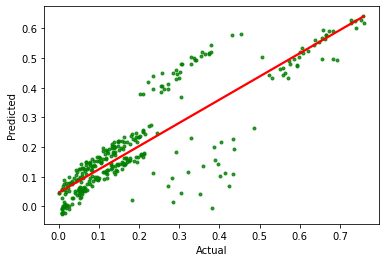

In [51]:
sns.regplot(x = df.Actual, y = df.Predicted, marker = '.', color = 'green', line_kws = {'color' : 'red'},ci = None)

### Ridge Regression

In [52]:
ridge = Ridge(alpha=1).fit(X_train1,y_train1)

prediction = ridge.predict(X_test1)

print('mean squared error :',mean_squared_error(y_test1, prediction))
print('R-square :', ridge.score(X_test1,y_test1))

mean squared error : 0.0091650736279039
R-square : 0.7450348039715936


[ 0.18676113  0.04914503  0.03674664 -0.03344048  0.02432804  0.03896097
  0.02788902 -0.02133232 -0.03640525 -0.19227002  0.19227002  0.01440926
  0.00159518 -0.00661947 -0.00938497]


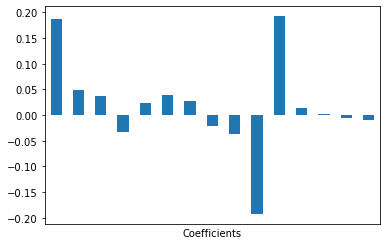

In [53]:
def plot_coef(model,ax=None):
    coeff = model.coef_
    print(coeff)
    df_coeff = pd.Series(coeff, index = X_test1.columns)
    ax = df_coeff.plot.bar(ax=ax)
    ax.set_xticks([])
    ax.set_xlabel('Coefficients')
    
plot_coef(ridge)

In [54]:
alpha_values = []
for i in range(-10,11):
    alpha_values.append(10**i)

MSE_train = []
MAE_train = []
R_square_train = []
MSE_test = []
R_square_test = []

for alpha in alpha_values:
    
    ridge = Ridge(alpha=alpha).fit(X_train1,y_train1)

    prediction = ridge.predict(X_train1)
    MSE_train.append(mean_squared_error(y_train1, prediction))
    R_square_train.append(ridge.score(X_train1,y_train1))
    
    
    prediction = ridge.predict(X_test1)
    MSE_test.append(mean_squared_error(y_test1, prediction))
    R_square_test.append(ridge.score(X_test1,y_test1))

In [55]:
dict_ = {
            'MSE_Train' : MSE_train,'MSE_test' : MSE_test,
            'R_square_train': R_square_train, 'R_square_test' : R_square_test
        }
metric_df = pd.DataFrame(dict_)
metric_df.index = alpha_values
metric_df

,MSE_Train,MSE_test,R_square_train,R_square_test
1.000000e-10,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-09,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-08,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-07,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-06,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-05,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-04,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-03,0.009040,0.009170,7.612541e-01,0.744893
1.000000e-02,0.009040,0.009170,7.612541e-01,0.744894
1.000000e-01,0.009040,0.009170,7.612539e-01,0.744907


### Lasso Regression

In [56]:
lasso = Lasso(alpha=0.0001).fit(X_train1,y_train1)

prediction = lasso.predict(X_test1)

print('mean squared error :',mean_squared_error(y_test1, prediction))
print('R-square :', lasso.score(X_test1,y_test1))

mean squared error : 0.00916296750368457
R-square : 0.7450933947037844


In [57]:
alpha_values = []
for i in range(-10,11):
    alpha_values.append(10**i)

MSE_train = []
R_square_train = []
MSE_test = []
R_square_test = []

for alpha in alpha_values:
    
    lasso = Lasso(alpha=alpha).fit(X_train1,y_train1)

    prediction = lasso.predict(X_train1)
    MSE_train.append(mean_squared_error(y_train1, prediction))
    R_square_train.append(lasso.score(X_train1,y_train1))
    
    
    prediction = lasso.predict(X_test1)
    MSE_test.append(mean_squared_error(y_test1, prediction))
    R_square_test.append(lasso.score(X_test1,y_test1))

In [58]:
dict_ = {
            'MSE_Train' : MSE_train,'MSE_test' : MSE_test,
            'R_square_train': R_square_train, 'R_square_test' : R_square_test
        }
metric_df = pd.DataFrame(dict_)
metric_df.index = alpha_values
metric_df

,MSE_Train,MSE_test,R_square_train,R_square_test
1.000000e-10,0.009040,0.009170,0.761254,0.744893
1.000000e-09,0.009040,0.009170,0.761254,0.744893
1.000000e-08,0.009040,0.009170,0.761254,0.744893
1.000000e-07,0.009040,0.009170,0.761254,0.744893
1.000000e-06,0.009040,0.009170,0.761254,0.744896
1.000000e-05,0.009040,0.009169,0.761254,0.744919
1.000000e-04,0.009042,0.009163,0.761208,0.745093
1.000000e-03,0.009149,0.009192,0.758371,0.744299
1.000000e-02,0.012064,0.011677,0.681395,0.675154
1.000000e-01,0.037865,0.035974,0.000000,-0.000780


### Decision Tree Regressor

In [59]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(X_train1,y_train1)
print("R-Squared on train dataset = {}".format(dtm.score(X_train1,y_train1)))

print("R-Squared on test dataset = {}".format(dtm.score(X_test1,y_test1)))

y_test_predicted = dtm.predict(X_test1)

print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))

R-Squared on train dataset = 0.8649791654925105
R-Squared on test dataset = 0.8458586330716418
MSE of the test data : 0.005540822822134359


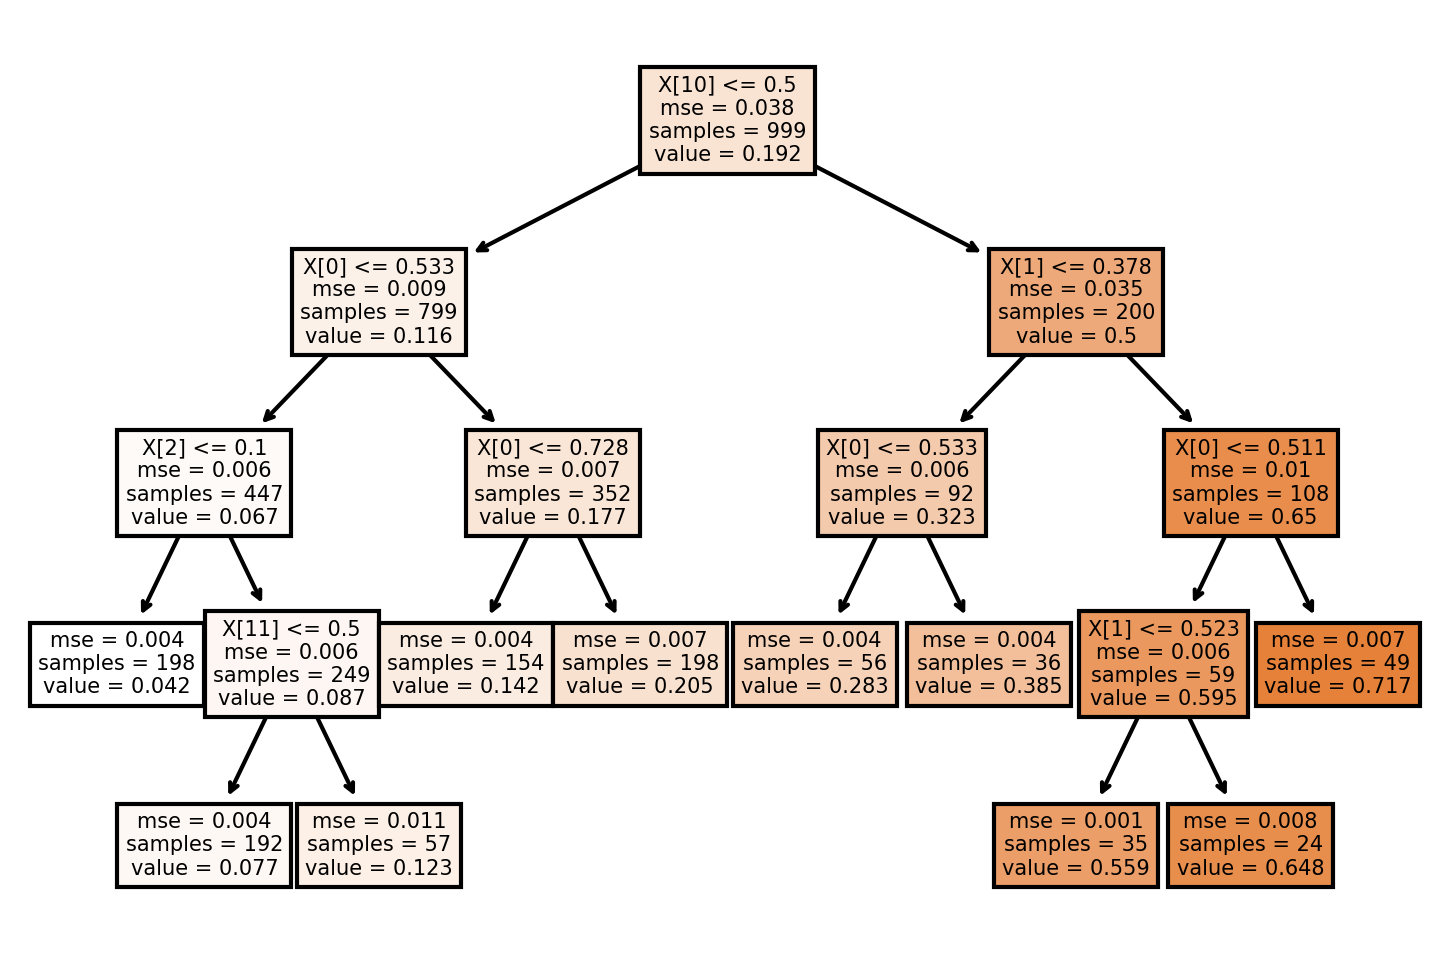

In [60]:
fig, axes = plt.subplots(dpi=300)

plot_tree(dtm,filled = True);

tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.8806871851172826 , MSE :  0.004737437080442325
tuned hyperparameters :(best parameters)  {'criterion': 'mae', 'max_depth': 4}
R-square :  0.7788423962448495 , MSE :  0.007339487678877197
tuned hyperparameters :(best parameters)  {'criterion': 'mae', 'max_depth': 4}
R-square :  0.8759999271102757 , MSE :  0.0046405118051037215
tuned hyperparameters :(best parameters)  {'criterion': 'mae', 'max_depth': 4}
R-square :  0.8303035596416903 , MSE :  0.0063282377677263794
tuned hyperparameters :(best parameters)  {'criterion': 'mae', 'max_depth': 4}
R-square :  0.8537436532647964 , MSE :  0.0057443986057823275


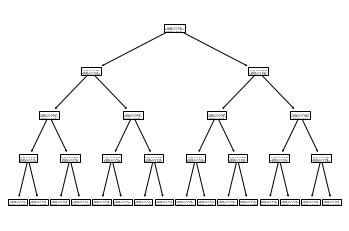

In [61]:
skf = KFold(n_splits=5)
scores = []
MSE = []
for train_index, test_index in skf.split(X1_std,y):
    X_train, X_test = X1_std.iloc[train_index], X1_std.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    grid = {'criterion':['mse', 'mae'],'max_depth': [2,4,6,8,10,12]}
    clf = DecisionTreeRegressor()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hyperparameters :(best parameters) ",clf_cv.best_params_)
    clf = DecisionTreeRegressor(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    plot_tree(clf)
    s = clf.score(X_test, y_test)
    y_test_predicted1 = clf.predict(X_test)
    mse = mean_squared_error(y_test_predicted1,y_test)
    print('R-square : ',s ,', MSE : ',mse)
    scores.append(s)
    MSE.append(mse)

In [62]:
print('AGGREGATED')
print('R-square : ',np.mean(scores),'MSE : ',np.mean(MSE))

AGGREGATED
R-square :  0.8439153442757791 MSE :  0.005758014587586391


In [63]:
MODEL.append('DecisionTreeRegressor')
R_SQUARE.append(dtm.score(X_test1,y_test1))
y_test_predicted = dtm.predict(X_test1)
MSE_VALUES.append(mean_squared_error(y_test_predicted,y_test1))
CROSS_VAL_SCORE.append(np.mean(scores))

### Random Forest Regressor

In [64]:
model = RandomForestRegressor(max_depth = 4)
model.fit(X_train1,y_train1)
model.predict(X_test1)

y_test_predicted = model.predict(X_test1)

print("R-Squared on test dataset = {}".format(model.score(X_test1,y_test1)))

print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))

R-Squared on test dataset = 0.8571174263850899
MSE of the test data : 0.005136110056288436


In [65]:

skf = KFold(n_splits=5)
scores = []
MSE = []
for train_index, test_index in skf.split(X1_std,y):
    X_train, X_test = X1_std.iloc[train_index], X1_std.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    grid = {'criterion':['mse', 'mae'],'max_depth': [2,4,6,8,10,12]}
    clf = RandomForestRegressor()

    clf_cv=GridSearchCV(clf,grid)
    clf_cv.fit(X_train,y_train)
    print("tuned hyperparameters :(best parameters) ",clf_cv.best_params_)
    clf = RandomForestRegressor(criterion=clf_cv.best_params_['criterion'], max_depth=clf_cv.best_params_['max_depth']).fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    y_test_predicted1 = clf.predict(X_test)
    mse = mean_squared_error(y_test_predicted1,y_test)
    print('R-square : ',s ,', MSE : ',mse)
    scores.append(s)
    MSE.append(mse)

tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.8902447572159791 , MSE :  0.004357943926216822
tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.80139338944853 , MSE :  0.006591094976322417
tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.8894652435168408 , MSE :  0.004136593071122881
tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.8397902546898132 , MSE :  0.005974464513746073
tuned hyperparameters :(best parameters)  {'criterion': 'mse', 'max_depth': 4}
R-square :  0.8744061273079625 , MSE :  0.004932854425067418


In [66]:
print('Score: %.3f' % (np.mean(scores)))
print('MSE: %.3f' % (np.mean(MSE)))

Score: 0.859
MSE: 0.005


In [67]:
MODEL.append('RandomForestRegressor')
R_SQUARE.append(model.score(X_test1,y_test1))
MSE_VALUES.append(mean_squared_error(y_test_predicted,y_test1))
CROSS_VAL_SCORE.append(np.mean(scores))

### KNN Regressor

In [68]:
for k in [1,2,3,4,8,11,15,20,50,100,200,300]:
    print('K = ',k)
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train1, y_train1)
    y_test_predicted = neigh.predict(X_test1)

    print('MSE of the test data :',mean_squared_error(y_test_predicted,y_test1))
    print('R-square of the test data : ',neigh.score(X_test1,y_test1))
    print('*'*50)

K =  1
MSE of the test data : 0.008352854766109221
R-square of the test data :  0.7676300988620736
**************************************************
K =  2
MSE of the test data : 0.006952300960748263
R-square of the test data :  0.8065924127539104
**************************************************
K =  3
MSE of the test data : 0.006309166008338773
R-square of the test data :  0.8244839252360974
**************************************************
K =  4
MSE of the test data : 0.006132654743748179
R-square of the test data :  0.8293943308699968
**************************************************
K =  8
MSE of the test data : 0.0061161817278226355
R-square of the test data :  0.829852597317726
**************************************************
K =  11
MSE of the test data : 0.006404877815589827
R-square of the test data :  0.8218212974505769
**************************************************
K =  15
MSE of the test data : 0.0069894271294916824
R-square of the test data :  0.805559591712229

Best k value - 8, MSE : 0.0061, R-square : 0.8298

In [70]:
model = KNeighborsRegressor(n_neighbors=8)

cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X1_std, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

print('Score: %.3f' % (np.mean(n_scores)))

Score: 0.786


In [71]:
MODEL.append('KNeighborsRegressor (k = 8)')
R_SQUARE.append(0.829852597317726)
MSE_VALUES.append(0.006404877815589827)
CROSS_VAL_SCORE.append(np.mean(n_scores))

### AdaBoostRegressor

In [72]:
from sklearn.ensemble import AdaBoostRegressor

In [73]:
model = AdaBoostRegressor()

model.fit(X_train1,y_train1)
pred = model.predict(X_test1)

print('Score : %.3f' % (model.score(X_test1,y_test1)))
print('Mean squared Error : %.3f' % (mean_squared_error(y_test1, pred)))

Score : 0.823
Mean squared Error : 0.006


In [74]:
model1 = AdaBoostRegressor()

cv = KFold(n_splits=10)
n_scores = cross_val_score(model1, X_train1, y_train1, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

y_pred = cross_val_predict(model1, X_test1,y_test1, n_jobs=-1)

print('R-square : %.3f' % (np.mean(n_scores)))
print('Mean squared Error : %.3f' % (mean_squared_error(y_test1, y_pred)))

R-square : 0.812
Mean squared Error : 0.007


In [75]:
MODEL.append('AdaBoostRegressor')
R_SQUARE.append(model.score(X_test1,y_test1))
MSE_VALUES.append(mean_squared_error(y_test1, pred))
CROSS_VAL_SCORE.append(np.mean(n_scores))

### Stacking

In [76]:
def stacking():

    level0 = list()
    level0.append(('ada', AdaBoostRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))

    level1 = LinearRegression()

    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [77]:
model1 = stacking()

model1.fit(X_train1,y_train1)

y_pred = model1.predict(X_test1)

print('MSE of the test data :',mean_squared_error(y_pred,y_test1))
print('R-square of the test data : ',model1.score(X_test1,y_test1))

MSE of the test data : 0.005469886279539734
R-square of the test data :  0.8478320323287029


In [78]:
model = stacking()

cv = KFold(n_splits=10)
n_scores = cross_val_score(model, X1_std, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
n_scores1 = cross_val_score(model, X1_std, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

print('Score: %.3f' % (np.mean(n_scores)))
print('MSE: %.3f' % (np.mean(n_scores1)*-1))

Score: 0.850
MSE: 0.006


In [79]:
MODEL.append('Stacking')
R_SQUARE.append(model1.score(X_test1,y_test1))
MSE_VALUES.append(mean_squared_error(y_pred,y_test1))
CROSS_VAL_SCORE.append(np.mean(n_scores))

### Deep learning

In [80]:
def CompileModel(units,shape,lf): 
    # define the network
    model = tf.keras.Sequential([
                        Dense(units,activation='relu',input_shape=[shape]),  # HL1
                        Dense(units,activation='relu'), # HL2,
                        Dense(units,activation='relu'),
                        Dense(1,activation='relu') # Output Layer
                        ])
    
    # compile the network
    model.compile(loss=lf,optimizer='adam',metrics=[RMSE])
    
    return(model)

# to print a dot after every 'n' iterations to show progress during model fit
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,lags):
        if epoch%10 == 0:
            print(".",end=" ")

# function: fitModel
# desc: fit the compiled NN model on the train data
def fitModel(model,trainx,trainy,epoch,valsplit=0.2):
    errors = model.fit(trainx,trainy,epochs=epoch,validation_split=valsplit,verbose=0,callbacks=[PrintDot()])
    
    errHistory = pd.DataFrame(errors.history)
    return(errHistory)

def PredictY(model, testx, testy):
    predictions = model.predict(testx).flatten()
    
    df = pd.DataFrame({'actual':testy , 'predicted' : predictions})
    
    return(df)

In [81]:
nodes = 15
inputshape = len(X_train1.columns)

MSE = tf.keras.losses.MeanSquaredError()
MAE = tf.keras.losses.MeanAbsoluteError()
RMSE = tf.keras.metrics.RootMeanSquaredError()

epochs = 200

In [82]:
m1 = CompileModel(nodes, inputshape, MSE)

e1 = fitModel(m1, X_train1, y_train1 , epochs)

. . . . . . . . . . . . . . . . . . . . 

In [83]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 16        
Total params: 736
Trainable params: 736
Non-trainable params: 0
_________________________________________________________________


In [84]:
print(e1)

         loss  root_mean_squared_error  val_loss  val_root_mean_squared_error
0    0.062750                 0.250500  0.054403                     0.233245
1    0.035933                 0.189561  0.031999                     0.178882
2    0.021100                 0.145258  0.017847                     0.133594
3    0.012212                 0.110508  0.010321                     0.101594
4    0.008807                 0.093844  0.008402                     0.091661
..        ...                      ...       ...                          ...
195  0.003825                 0.061850  0.005891                     0.076751
196  0.003923                 0.062632  0.005654                     0.075194
197  0.003925                 0.062647  0.005657                     0.075214
198  0.003878                 0.062276  0.005792                     0.076108
199  0.003845                 0.062008  0.005974                     0.077289

[200 rows x 4 columns]


In [85]:
p1 = PredictY(m1, X_test1, y_test1)
print(p1)

        actual  predicted
1217  0.046868   0.084854
267   0.214989   0.288523
219   0.382449   0.038570
405   0.164011   0.224364
35    0.008038   0.037621
...        ...        ...
782   0.131915   0.182012
75    0.163368   0.169958
605   0.130277   0.226259
892   0.148464   0.168556
1270  0.034648   0.085395

[334 rows x 2 columns]


In [86]:
mse1 = mean_squared_error(p1.actual,p1.predicted)
r_square =  r2_score(p1.actual,p1.predicted)
print('MSE = {}, R-Square = {}'.format(mse1,r_square,m1))

MSE = 0.005985973244728763, R-Square = 0.8334748957044529


In [87]:
MODEL.append('Deep Learning')
R_SQUARE.append(r_square)
MSE_VALUES.append(mse1)
CROSS_VAL_SCORE.append('--')

In [88]:
pd.DataFrame({'Model' : MODEL, 'MSE' : MSE_VALUES, 'R-Square' : R_SQUARE, 'Cross Val Score' : CROSS_VAL_SCORE})

,Model,MSE,R-Square,Cross Val Score
0,Linear Regression,0.009181,0.744580,0.742933
1,DecisionTreeRegressor,0.005541,0.845859,0.843915
2,RandomForestRegressor,0.005136,0.857117,0.85906
3,KNeighborsRegressor (k = 8),0.006405,0.829853,0.7858
4,AdaBoostRegressor,0.006347,0.823440,0.811747
5,Stacking,0.005470,0.847832,0.850447
6,Deep Learning,0.005986,0.833475,--


### Conclusion : RandomForestRegressor is the best among all the models because of low MSE, higher R-square, higher Cross val score

In [89]:
model = RandomForestRegressor(max_depth = 4)
model.fit(X_train1,y_train1)
model.predict(X_test1)

y_test_predicted = model.predict(X_test1)

df = pd.DataFrame({'Actual' : y_test1 , 'Predicted' : y_test_predicted})

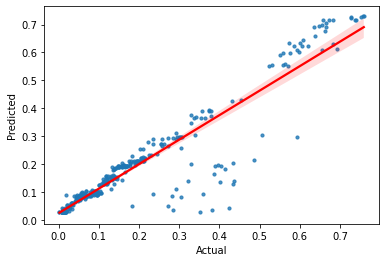

In [90]:
sns.regplot(df.Actual, df.Predicted,line_kws={"color": "red"},scatter_kws={'s':10})

In [91]:
mm1 = preprocessing.MinMaxScaler()
mm1.fit_transform(data[['charges']])

pd.DataFrame(mm1.inverse_transform(df),columns=['Actual','Predicted'])

,Actual,Predicted
0,4058.11610,6689.839136
1,14590.63205,15028.809507
2,25081.76784,3451.418475
3,11396.90020,13462.944223
4,1625.43375,2969.824175
...,...,...
329,9386.16130,10641.566881
330,11356.66090,13133.668158
331,9283.56200,10522.174902
332,10422.91665,13054.030620
